In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [3]:
train_path = "../Computer Vision Masterclass/Datasets/cat_dog_2/training_set"
test_path = "../Computer Vision Masterclass/Datasets/cat_dog_2/test_set"

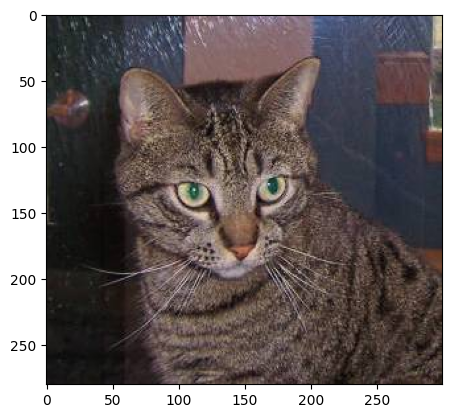

In [4]:
img = cv2.imread(train_path + "/cat/cat.1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
plt.imshow(img)

In [5]:
# ImageDataGenerator to apply data augmentation, randomly translating, rotating, resizing, etc.
train_datagen = ImageDataGenerator(rescale=1. / 255)
train_datagen.fill_mode='constant'
train_datagen.horizontal_flip=True
train_datagen.zoom_range=[0.8, 1.2]
train_datagen.rotation_range=20
train_datagen.shear_range=10
train_datagen.brightness_range = [0.75, 1.5]



#making image as 227X227 for input of alexnet
# train = train_datagen.flow_from_directory(train_path, target_size=(227,227), class_mode='categorical')
train = train_datagen.flow_from_directory(train_path, target_size=(64, 64), shuffle=True, class_mode='categorical')


Found 4000 images belonging to 2 classes.


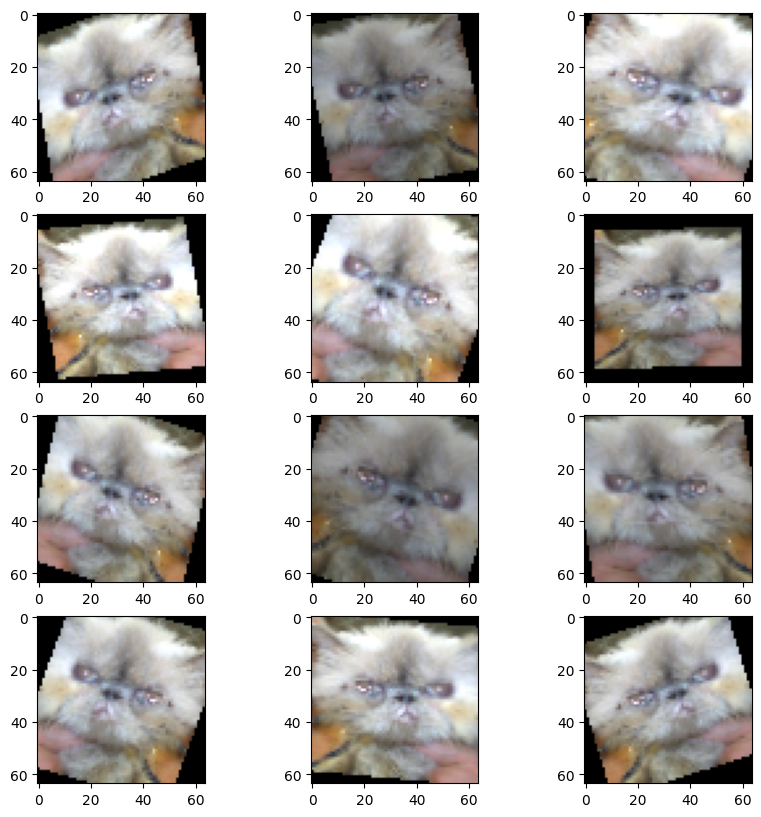

In [6]:
fig , axs = plt.subplots(4,3 ,figsize = (10,10))

axs[0][0].imshow(train[1][0][0])
axs[0][1].imshow(train[1][0][0])
axs[0][2].imshow(train[1][0][0])
axs[1][0].imshow(train[1][0][0])
axs[1][1].imshow(train[1][0][0])
axs[1][2].imshow(train[1][0][0])
axs[2][0].imshow(train[1][0][0])
axs[2][1].imshow(train[1][0][0])
axs[2][2].imshow(train[1][0][0])
axs[3][0].imshow(train[1][0][0])
axs[3][1].imshow(train[1][0][0])
axs[3][2].imshow(train[1][0][0])

In [7]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

test = test_datagen.flow_from_directory(test_path, target_size=(64,64), shuffle=False, class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [8]:
network = Sequential()


network.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(8, 8, 3)))

network.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))


network.summary()

d:\D-Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 64)       │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 32)       │        18,464 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,256 (79.12 KB)

 Trainable params: 20,256 (79.12 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Concatenate, Input, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    # 1x1 convolution branch
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)
    
    # 3x3 convolution branch
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)
    
    # 5x5 convolution branch
    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5)
    
    # Pooling branch
    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)
    
    # Concatenate all branches
    output = Concatenate(axis=-1)([conv_1x1, conv_3x3, conv_5x5, pool_proj])
    
    return output

# Create an example Inception network
input_img = Input(shape=(64, 64, 3))

# Initial layers before the Inception modules
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_img)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Add multiple Inception modules
# x = inception_module(x, 64, 96, 128, 16, 32, 32)
# x = inception_module(x, 128, 128, 192, 32, 96, 64)
x = inception_module(x, 16, 64, 128, 16, 32, 32)
x = inception_module(x, 64, 64, 192, 32, 96, 64)

# Add more layers if needed, here we directly go to the final layers for simplicity
# x = GlobalAveragePooling2D()(x)
# x = AveragePooling2D((3, 3), padding='same')(x)
x = MaxPooling2D((3, 3), padding='same')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(2, activation='softmax')(x)


# Create the model
network = Model(input_img, x)

# Print the model summary
network.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 32, 32,    │      9,472 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 16, 16,    │          0 │ conv2d_16[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 16, 16,    │    110,784 │ max_pooling2d_5[… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 8, 8, 192) │          0 │ conv2d_17[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 8, 8, 64)  │     12,352 │ max_pooling2d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 8, 8, 16)  │      3,088 │ max_pooling2d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 8, 8, 192) │          0 │ max_pooling2d_6[… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 8, 8, 16)  │      3,088 │ max_pooling2d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 8, 8, 128) │     73,856 │ conv2d_19[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 8, 8, 32)  │     12,832 │ conv2d_21[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 8, 8, 32)  │      6,176 │ max_pooling2d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 8, 8, 208) │          0 │ conv2d_18[0][0],  │
│ (Concatenate)       │                   │            │ conv2d_20[0][0],  │
│                     │                   │            │ conv2d_22[0][0],  │
│                     │                   │            │ conv2d_23[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 8, 8, 64)  │     13,376 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 8, 8, 32)  │      6,688 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 8, 8, 208) │          0 │ concatenate_2[0]… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 8, 8, 64)  │     13,376 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 8, 8, 192) │    110,784 │ conv2d_25[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 8, 8, 96)  │     76,896 │ conv2d_27[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 8, 8, 64)  │     13,376 │ max_pooling2d_8[

 Total params: 473,634 (1.81 MB)

 Trainable params: 473,634 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Concatenate, Input, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model


def module_A(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    # 1x1 convolution branch
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)
    
    # 3x3 convolution branch
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)
    
    # 5x5 convolution branch
    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (3, 3), padding='same', activation='relu')(conv_5x5)
    conv_5x5 = Conv2D(filters_5x5, (3, 3), padding='same', activation='relu')(conv_5x5)
    
    # Pooling branch
    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)
    
    # Concatenate all branches
    output = Concatenate(axis=-1)([conv_1x1, conv_3x3, conv_5x5, pool_proj])
    
    return output



def module_B(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    # 1x1 convolution branch
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)
    
    # 3x3 convolution branch
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (1, 3), padding='same', activation='relu')(conv_3x3)
    conv_3x3 = Conv2D(filters_3x3, (3, 1), padding='same', activation='relu')(conv_3x3)
    
    # 5x5 convolution branch
    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (1, 3), padding='same', activation='relu')(conv_5x5)
    conv_5x5 = Conv2D(filters_5x5, (3, 1), padding='same', activation='relu')(conv_5x5)
    conv_5x5 = Conv2D(filters_5x5, (1, 3), padding='same', activation='relu')(conv_5x5)
    conv_5x5 = Conv2D(filters_5x5, (3, 1), padding='same', activation='relu')(conv_5x5)
    
    # Pooling branch
    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)
    
    # Concatenate all branches
    output = Concatenate(axis=-1)([conv_1x1, conv_3x3, conv_5x5, pool_proj])
    
    return output



def module_C(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    # 1x1 convolution branch
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)
    
    # 3x3 convolution branch
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3_1 = Conv2D(filters_3x3, (1, 3), padding='same', activation='relu')(conv_3x3)
    conv_3x3_2 = Conv2D(filters_3x3, (3, 1), padding='same', activation='relu')(conv_3x3)
    
    # 5x5 convolution branch
    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (3, 3), padding='same', activation='relu')(conv_5x5)
    conv_5x5_1 = Conv2D(filters_5x5, (1, 3), padding='same', activation='relu')(conv_5x5)
    conv_5x5_2 = Conv2D(filters_5x5, (3, 1), padding='same', activation='relu')(conv_5x5)
    
    # Pooling branch
    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)
    
    # Concatenate all branches
    output = Concatenate(axis=-1)([conv_1x1, conv_3x3_1, conv_3x3_2, conv_5x5_1, conv_5x5_2, pool_proj])
    
    return output





# Create an example Inception network
input_img = Input(shape=(64, 64, 3))

# Initial layers before the Inception modules
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_img)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Add multiple Inception modules
x = module_A(x, 16, 64, 128, 16, 32, 32)
x = module_A(x, 64, 64, 192, 32, 96, 64)
x = module_B(x, 16, 64, 128, 16, 32, 32)
x = module_B(x, 64, 64, 192, 32, 96, 64)
x = module_C(x, 16, 64, 128, 16, 32, 32)
x = module_C(x, 64, 64, 192, 32, 96, 64)

# Add more layers if needed, here we directly go to the final layers for simplicity
# x = GlobalAveragePooling2D()(x)
# x = AveragePooling2D((3, 3), padding='same')(x)
x = MaxPooling2D((3, 3), padding='same')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(2, activation='softmax')(x)


# Create the model
network = Model(input_img, x)

# Print the model summary
network.summary()


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_174 (Conv2D) │ (None, 32, 32,    │      9,472 │ input_layer_7[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_40    │ (None, 16, 16,    │          0 │ conv2d_174[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_175 (Conv2D) │ (None, 16, 16,    │    110,784 │ max_pooling2d_40… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_41    │ (None, 8, 8, 192) │          0 │ conv2d_175[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_179 (Conv2D) │ (None, 8, 8, 16)  │      3,088 │ max_pooling2d_41… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_177 (Conv2D) │ (None, 8, 8, 64)  │     12,352 │ max_pooling2d_41… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_180 (Conv2D) │ (None, 8, 8, 32)  │      4,640 │ conv2d_179[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_42    │ (None, 8, 8, 192) │          0 │ max_pooling2d_41… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_176 (Conv2D) │ (None, 8, 8, 16)  │      3,088 │ max_pooling2d_41… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_178 (Conv2D) │ (None, 8, 8, 128) │     73,856 │ conv2d_177[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_181 (Conv2D) │ (None, 8, 8, 32)  │      9,248 │ conv2d_180[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_182 (Conv2D) │ (None, 8, 8, 32)  │      6,176 │ max_pooling2d_42… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_20      │ (None, 8, 8, 208) │          0 │ conv2d_176[0][0], │
│ (Concatenate)       │                   │            │ conv2d_178[0][0], │
│                     │                   │            │ conv2d_181[0][0], │
│                     │                   │            │ conv2d_182[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_186 (Conv2D) │ (None, 8, 8, 32)  │      6,688 │ concatenate_20[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_184 (Conv2D) │ (None, 8, 8, 64)  │     13,376 │ concatenate_20[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_187 (Conv2D) │ (None, 8, 8, 96)  │     27,744 │ conv2d_186[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_43    │ (None, 8, 8, 208) │          0 │ concatenate_20[0… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_183 (Conv2D) │ (None, 8, 8, 64)  │     13,376 │ concatenate_20[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_185 (Conv2D) │ (None, 8, 8, 192) │    110,784 │ conv2d_184[0][0]

 Total params: 1,281,570 (4.89 MB)

 Trainable params: 1,281,570 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Concatenate, Input, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model


def module_A(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    # 1x1 convolution branch
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)
    
    # 3x3 convolution branch
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)
    
    # 5x5 convolution branch
    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (3, 3), padding='same', activation='relu')(conv_5x5)
    conv_5x5 = Conv2D(filters_5x5, (3, 3), padding='same', activation='relu')(conv_5x5)
    
    # Pooling branch
    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)
    
    # Concatenate all branches
    output = Concatenate(axis=-1)([conv_1x1, conv_3x3, conv_5x5, pool_proj])
    
    return output



def module_B(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    # 1x1 convolution branch
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)
    
    # 3x3 convolution branch
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (1, 3), padding='same', activation='relu')(conv_3x3)
    conv_3x3 = Conv2D(filters_3x3, (3, 1), padding='same', activation='relu')(conv_3x3)
    
    # 5x5 convolution branch
    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (1, 3), padding='same', activation='relu')(conv_5x5)
    conv_5x5 = Conv2D(filters_5x5, (3, 1), padding='same', activation='relu')(conv_5x5)
    conv_5x5 = Conv2D(filters_5x5, (1, 3), padding='same', activation='relu')(conv_5x5)
    conv_5x5 = Conv2D(filters_5x5, (3, 1), padding='same', activation='relu')(conv_5x5)
    
    # Pooling branch
    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)
    
    # Concatenate all branches
    output = Concatenate(axis=-1)([conv_1x1, conv_3x3, conv_5x5, pool_proj])
    
    return output



def module_C(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    # 1x1 convolution branch
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)
    
    # 3x3 convolution branch
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3_1 = Conv2D(filters_3x3, (1, 3), padding='same', activation='relu')(conv_3x3)
    conv_3x3_2 = Conv2D(filters_3x3, (3, 1), padding='same', activation='relu')(conv_3x3)
    
    # 5x5 convolution branch
    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (1, 3), padding='same', activation='relu')(conv_5x5)
    conv_5x5 = Conv2D(filters_5x5, (3, 1), padding='same', activation='relu')(conv_5x5)
    conv_5x5_1 = Conv2D(filters_5x5, (1, 3), padding='same', activation='relu')(conv_5x5)
    conv_5x5_2 = Conv2D(filters_5x5, (3, 1), padding='same', activation='relu')(conv_5x5)
    
    # Pooling branch
    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)
    
    # Concatenate all branches
    output = Concatenate(axis=-1)([conv_1x1, conv_3x3_1, conv_3x3_2, conv_5x5_1, conv_5x5_2, pool_proj])
    
    return output



def auxiliary_classifier(x):
    aux = AveragePooling2D((3, 3), padding='same')(x)
    # aux = MaxPooling2D((3, 3), padding='same')(x)
    aux = Conv2D(32, (1, 1), padding='same', activation='relu')(aux)
    aux = Conv2D(32, (1, 1), padding='same', activation='relu')(aux)
    aux = Flatten()(aux)
    aux = Dropout(0.2)(aux)
    aux = Dense(2, activation='softmax')(aux)


# Create an example Inception network
input_img = Input(shape=(64, 64, 3))

# Initial layers before the Inception modules
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_img)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Add multiple Inception modules
x = module_A(x, 16, 64, 128, 16, 32, 32)
x = module_A(x, 64, 64, 192, 32, 96, 64)
aux1 = auxiliary_classifier(x)
x = module_B(x, 16, 64, 128, 16, 32, 32)
x = module_B(x, 64, 64, 192, 32, 96, 64)
aux2 = auxiliary_classifier(x)
x = module_C(x, 16, 64, 128, 16, 32, 32)
x = module_C(x, 64, 64, 192, 32, 96, 64)

# Add more layers if needed, here we directly go to the final layers for simplicity
x = GlobalAveragePooling2D()(x)
# x = AveragePooling2D((3, 3), padding='same')(x)
# x = MaxPooling2D((3, 3), padding='same')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(2, activation='softmax')(x)


# Create the model
network = Model(input_img, x)

# Print the model summary
network.summary()


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_286 (Conv2D) │ (None, 32, 32,    │      9,472 │ input_layer_9[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_59    │ (None, 16, 16,    │          0 │ conv2d_286[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_287 (Conv2D) │ (None, 16, 16,    │    110,784 │ max_pooling2d_59… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_60    │ (None, 8, 8, 192) │          0 │ conv2d_287[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_291 (Conv2D) │ (None, 8, 8, 16)  │      3,088 │ max_pooling2d_60… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_289 (Conv2D) │ (None, 8, 8, 64)  │     12,352 │ max_pooling2d_60… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_292 (Conv2D) │ (None, 8, 8, 32)  │      4,640 │ conv2d_291[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_61    │ (None, 8, 8, 192) │          0 │ max_pooling2d_60… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_288 (Conv2D) │ (None, 8, 8, 16)  │      3,088 │ max_pooling2d_60… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_290 (Conv2D) │ (None, 8, 8, 128) │     73,856 │ conv2d_289[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_293 (Conv2D) │ (None, 8, 8, 32)  │      9,248 │ conv2d_292[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_294 (Conv2D) │ (None, 8, 8, 32)  │      6,176 │ max_pooling2d_61… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_32      │ (None, 8, 8, 208) │          0 │ conv2d_288[0][0], │
│ (Concatenate)       │                   │            │ conv2d_290[0][0], │
│                     │                   │            │ conv2d_293[0][0], │
│                     │                   │            │ conv2d_294[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_298 (Conv2D) │ (None, 8, 8, 32)  │      6,688 │ concatenate_32[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_296 (Conv2D) │ (None, 8, 8, 64)  │     13,376 │ concatenate_32[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_299 (Conv2D) │ (None, 8, 8, 96)  │     27,744 │ conv2d_298[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_62    │ (None, 8, 8, 208) │          0 │ concatenate_32[0… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_295 (Conv2D) │ (None, 8, 8, 64)  │     13,376 │ concatenate_32[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_297 (Conv2D) │ (None, 8, 8, 192) │    110,784 │ conv2d_296[0][0]

 Total params: 1,290,914 (4.92 MB)

 Trainable params: 1,290,914 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Define the learning rate you want to use
learning_rate = 0.0001  # Example learning rate

# Instantiate the Adam optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile your neural network model with the customized optimizer
network.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
history = network.fit(train, epochs=20)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.5069 - loss: 0.6931
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.4954 - loss: 0.6930
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.5233 - loss: 0.6916
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.5243 - loss: 0.6930
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.5069 - loss: 0.6927
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.5553 - loss: 0.6891
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.5920 - loss: 0.6766
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.6109 - loss: 0.6540
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.6404 - loss: 0.6299
Epoch 10/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.6656 - loss: 0.6188
Epoch 11/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.6578 - loss: 0.6164
Epoch 12/20
125/125 ━━━━━━━━━━━━━━━━━━━━

In [47]:
predictions = network.predict(test)
predictions

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


array([[0.82254505, 0.17745493],
       [0.1280675 , 0.8719325 ],
       [0.5009158 , 0.49908414],
       ...,
       [0.15155709, 0.848443  ],
       [0.11493784, 0.8850622 ],
       [0.10238562, 0.8976144 ]], dtype=float32)

In [48]:
# predicted values
predictions = np.argmax(predictions, axis=1)
predictions 

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,

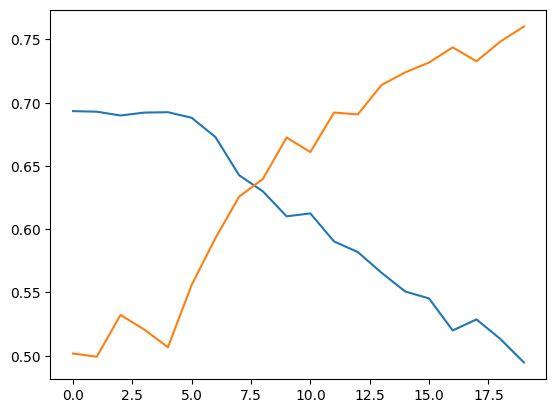

In [49]:
plt.plot(history.history['loss'] )
plt.plot(history.history['accuracy'] )

In [50]:
from sklearn.metrics import accuracy_score

accuracy_score(test.classes, predictions)

0.719